In [2]:
import os
import csv
import numpy as np
import utils
import hrr_utils
import RM_utils
import Regression_utils as r_utils
import time
import random
import scipy
import sklearn

from scipy import spatial
from scipy.spatial import distance
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline

cwd = os.getcwd()

alph = 'abcdefghijklmnopqrstuvwxyz#.'
N=1000
D = len(alph)
dic1 = letter_vecs = 2 * (np.random.randn(D, N) < 0) - 1
dic2 = letter_vecs = 2 * (np.random.randn(D, N) < 0) - 1


In [3]:
def shuffle(arr):
    indices = [i for i in range(len(arr))]
    random.shuffle(indices)
    newarr = [arr[i] for i in indices]
    return newarr
    
reg_pres, reg_past, reg_freq = utils.GetRegularVerbs(frequency=1)
irreg_pres, irreg_past, irreg_freq = utils.GetIrregularVerbs(frequency=1)

regular = zip(reg_pres, reg_past, reg_freq)
irregular = zip(irreg_pres, irreg_past, irreg_freq)

train_frac = 2/3.0

irregular_train_idx = int(train_frac*len(irreg_pres))
train_irreg = shuffle(irregular[0:irregular_train_idx])

regular_train_idx = 1700 - len(train_irreg) 
train_reg = shuffle(regular[0:regular_train_idx])

test_reg = shuffle(regular[regular_train_idx:])
test_irreg = shuffle(irregular[irregular_train_idx:])

train_all = shuffle(train_reg + train_irreg)
test_all = shuffle(test_reg + test_irreg)


In [4]:
print len(train_irreg)
print len(train_reg)

122
1578


In [3]:
trainX, trainpres1, trainpres2, trainpast1, trainpast2 = RM_utils.genX(train_all, N, dic1, dic2, alph)
testX, testpres1, testpres2, testpast1, testpast2 = RM_utils.genX(test_all, N, dic1, dic2, alph)

regtrainX, regtrainpres1, regtrainpres2, regtrainpast1, regtrainpast2 = RM_utils.genX(train_reg, N, dic1, dic2, alph)
regtestX, regtestpres1, regtestpres2, regtestpast1, regtestpast2 = RM_utils.genX(test_reg, N, dic1, dic2, alph)

irregtrainX, irregtrainpres1, irregtrainpres2, irregtrainpast1, irregtrainpast2 = RM_utils.genX(train_irreg, N, dic1, dic2, alph)
irregtestX, irregtestpres1, irregtestpres2, irregtestpast1, irregtestpast2 = RM_utils.genX(test_irreg, N, dic1, dic2, alph)

In [5]:
x, y1, y2, yreg, yirreg, y1std, y2std, yregstd, yirregstd, acc1, acc2, accreg, accirreg = \
r_utils.closed_trigram_dict(trainpres1, testpres1, \
                            trainpast2, testpast2, \
                            regtestpres1, irregtestpres1, \
                            regtestpast2, irregtestpast2, \
                            N, 5e-2)

figures/regression-unregularized_closedform-trigram-N=1000-W=1700-171130


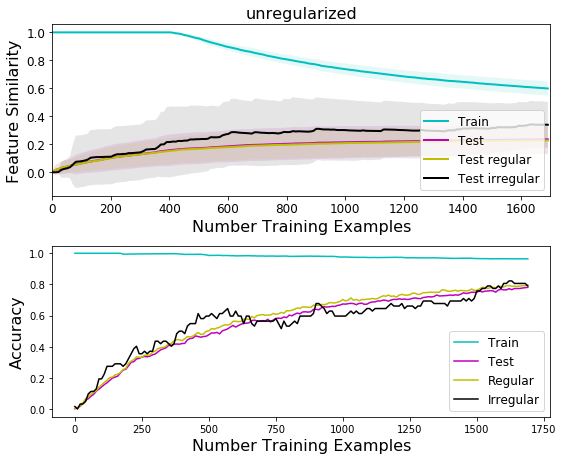

In [18]:
r_utils.graph(x, y1, y2, y1std, y2std, \
              yreg, yirreg, yregstd, yirregstd, \
              acc1, acc2, accreg, accirreg, \
              title='regularized', xlabel='number of words', ylabel='average dot product', legend='lower right')
    
fname =  ('figures/reg5ression-unregularized_closedform-trigram-N=' + str(N) + '-W=' + str(len(trainpres1)) 
          + '-' + time.strftime('%y%m%d'))
print fname

plt.savefig(fname + '.png', transparent=True)
plt.savefig(fname + '.eps', transparent=True)


In [7]:
x = np.arange(1, trainpres1.shape[0], 10)
y1 = np.zeros(x.shape[0])
y2 = np.zeros(x.shape[0])
y1std = np.zeros(x.shape[0])
y2std = np.zeros(x.shape[0])

y1irregular = np.zeros(x.shape[0])
y2irregular = np.zeros(x.shape[0])

sim2indices = [j for j in range(testpres1.shape[0]) if test_all_indices[j] >= len(test_reg)]

for i in range(x.shape[0]):#trainpres1.shape[0]):
    k = x[i]
    W = closed_train(trainpast2[:k]-trainpres2[:k], trainpres1[:k])
    train_pred = trainpres1[:k].dot(W) + trainpres2[:k]
    test_pred = testpres1.dot(W) + testpres2

    sim1 = sim(train_pred, trainpast2[:k])
    sim2 = sim(test_pred, testpast2)
    
    sim1indices = [j for j in range(sim1.shape[0]) if train_all_indices[j] >= len(train_reg)]

    irregularsim1 = sim1[sim1indices]
    irregularsim2 = sim2[sim2indices]
    
    y1[i] = sim1.mean()/N
    y1std[i] = np.nanstd(sim1, axis=0)/N
    y2[i] = sim2.mean()/N
    y2std[i] = np.nanstd(sim2, axis=0)/N
    
    y1irregular[i] = irregularsim1.mean()/N
    y2irregular[i] = irregularsim2.mean()/N
    
graph(x,y1,y2,y1std,y2std,title="diff-unregularized", legend="lower left")

fname =  ('figures/regression-diff_unregularized_closedform_trigam-N=' + str(N) + '-W=' + str(len(trainpres1)) 
          + '-' + time.strftime('%y%m%d'))
print fname

plt.savefig(fname + '.png', transparent=True)
plt.savefig(fname + '.eps', transparent=True)

NameError: name 'trainpres1' is not defined

In [8]:
graph_separate(x, y1, y2, y1std, y2std, \
                   y1irregular, y2irregular, \
                   title="diff-unregularized",legend="upper left")  

fname =  ('figures/regression-separate-diff_unregularized_closedform_trigam-N=' + str(N) + '-W=' + str(len(trainpres1)) 
          + '-' + time.strftime('%y%m%d'))
print fname

plt.savefig(fname + '.png', transparent=True)
plt.savefig(fname + '.eps', transparent=True)

NameError: name 'graph_separate' is not defined